# COMP47670 Assignment II Autumn 2023
## Time Series Running Data

## Objective
The objective of this assignment is to identify good models for classifying time series data.  
The data is from an accelerometer sensor and there are samples of fatigued and non-fatigued running. The data has been segmented into strides and the segments (samples) are labelled F (fatigued) and NF (not fatigued). The data for two subjects A and B are available in the files  `fatigueA.csv` and  `fatigueB.csv`. This dataset is extracted from a much larger dataset described [here](https://openreview.net/pdf?id=9c0lAonDNP).  
At present, the best performing method for time-series classification is [Rocket](https://openreview.net/pdf?id=9c0lAonDNP). 
A rocket implementation is available in the [sktime tool kit](https://www.sktime.net/en/latest/api_reference/auto_generated/sktime.transformations.panel.rocket.Rocket.html). This sktime implementation can be used in this assignment.   
Some code to get you started in available in the notebook `RunningCore`.



## Understanding the data 
Data from an accelerometer sensor collected during activities like running can be considered time series data because it consists of measurements taken over time. the data has been segmented into strides, meaning each segment corresponds to one stride, and each is a time series of accelerometer readings.

We are dealing with multivariate time series data where data with two or more variables are recorded over time. It is important to note that due to the nature of the dataset cross-validation is able to be used for the dataset as each stride is independent of the next. Usually for time series data there is a natural ordering that needs to be preserved when splitting the data and a time series split enables the possibility of preserving this order however in our case cross-validation is appropriate. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import make_scorer
from sklearn.svm import SVC 

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sktime.transformations.panel.rocket import Rocket
from sktime.datatypes import convert

In [82]:
fatigue_df = pd.read_csv('fatigueA.csv', header = None) # sep = '\s+')
print(fatigue_df.shape)
fatigue_df

(421, 181)


,0,1,2,3,4,5,6,7,8,9,...,171,172,173,174,175,176,177,178,179,180
0,F,2.72,2.69,2.750,2.890,3.07,3.27,3.48,3.67,3.82,...,6.50,6.16,5.75,5.29,4.79,4.29,3.83,3.42,3.09,2.85
1,F,2.68,2.47,2.460,2.540,2.69,2.93,3.36,3.99,4.75,...,2.79,3.88,5.18,6.29,6.88,6.80,6.13,5.11,4.04,3.20
2,F,5.04,5.69,6.210,6.520,6.59,6.47,6.26,6.06,5.91,...,5.89,5.29,4.72,4.20,3.77,3.47,3.36,3.47,3.82,4.38
3,F,2.42,3.21,4.020,4.580,4.77,4.64,4.39,4.25,4.42,...,8.60,8.76,8.76,8.32,7.34,5.91,4.33,2.97,2.14,1.98
4,F,3.35,3.40,3.890,4.710,5.66,6.47,6.90,6.81,6.25,...,9.45,8.52,7.75,7.14,6.63,6.15,5.60,4.96,4.28,3.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,NF,2.37,3.17,3.810,4.180,4.32,4.42,4.68,5.27,6.17,...,6.41,6.24,5.91,5.26,4.27,3.11,2.07,1.39,1.26,1.64
417,NF,2.42,1.86,1.910,2.640,3.84,5.11,6.02,6.29,5.93,...,7.45,5.94,4.63,3.85,3.68,3.96,4.32,4.41,4.04,3.28
418,NF,2.17,1.45,1.850,3.430,5.69,7.76,8.86,8.69,7.60,...,8.58,8.57,7.83,6.84,6.08,5.75,5.69,5.46,4.73,3.49
419,NF,2.07,1.16,0.671,0.737,1.37,2.46,3.84,5.33,6.78,...,8.02,7.08,6.45,6.14,6.04,5.96,5.71,5.16,4.29,3.19


In [3]:
#Check null/na values to see what kind of data preproocessing is required.
print(fatigue_df.isnull().sum().sum())


0


Text(0, 0.5, 'Accel Mag')

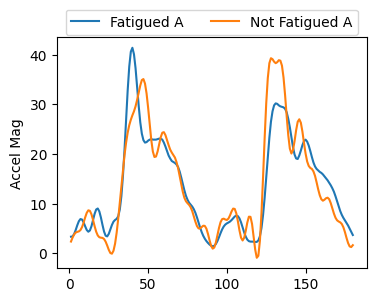

In [4]:
fatigue_df.iloc[4][1:].plot(label='Fatigued A')
fatigue_df.iloc[-5][1:].plot(figsize=(4,3), label = 'Not Fatigued A')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),ncol=2)
plt.ylabel('Accel Mag')


In [5]:
y = fatigue_df.pop(0).values
X = fatigue_df.values

In [6]:
X.shape, y.shape

((421, 180), (421,))

### Task 1
Calculate the baseline accuracy of a logistic regression (SGDClassifier) on the raw time series data for subject A. 

#### Initilaise classifier,  fit model using cross validation



In [7]:
sgd_classifier = SGDClassifier(loss='log_loss', random_state=100)

In [8]:
print(sgd_classifier.get_params())

{'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'log_loss', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': 100, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


#### Baseline accuracy


In [9]:
sgd_baseline_accuracy = cross_val_score(sgd_classifier, X, y, cv=8, verbose = 0,  n_jobs = -1)
print("8x CV Accuracy SDGClassifiers: {0:.2f}".format(sgd_baseline_accuracy.mean())) 
sgd_baseline_accuracy

8x CV Accuracy SDGClassifiers: 0.78


array([0.77358491, 0.79245283, 0.88679245, 0.77358491, 0.60377358,
       0.67307692, 0.94230769, 0.78846154])

#### Observation on baseline SGDClassifier 

1. We that our model with no hyper tuning of any parameters produces an accuracy rate of 0.78 for subject dataset A. 
2. Due to the nature of the dataset being quite small, I decided that a cross-valuation would be better to evaluate the accuracy of the dataset.
3. In small datasets, every data point is valuable. Cross-validation allows for the use of all available data for both training and validation, rather than having to split the data into separate training and test sets which might leave too few samples for effective training or validation. 

### Task 2
The RunningCore Notebook contains code to convert the data to the sktime time-series format. Using this format assess the accuracy of the Rocket transformer coupled with an SGDClassifier classifier on the data for subject A. 

#### Create 3D shape of our data

In [10]:
X3d = X[:,np.newaxis,:] # time series algs require a 3D data array (sample, var, tick)
X3d.shape

(421, 1, 180)

In [11]:
# sktime-series format 
X3d

array([[[2.72 , 2.69 , 2.75 , ..., 3.42 , 3.09 , 2.85 ]],

       [[2.68 , 2.47 , 2.46 , ..., 5.11 , 4.04 , 3.2  ]],

       [[5.04 , 5.69 , 6.21 , ..., 3.47 , 3.82 , 4.38 ]],

       ...,

       [[2.17 , 1.45 , 1.85 , ..., 5.46 , 4.73 , 3.49 ]],

       [[2.07 , 1.16 , 0.671, ..., 5.16 , 4.29 , 3.19 ]],

       [[2.37 , 2.01 , 2.12 , ..., 4.57 , 3.92 , 3.09 ]]])

#### Implementing Rocket Model Specification and fit SGDClassifier 

In [12]:
baseline_rocket_pipeline = make_pipeline(
    Rocket(), sgd_classifier)


#### Baseline Accuracy


In [13]:
baseline_accuracy_rocket = cross_val_score(baseline_rocket_pipeline, X3d, y, cv=8, verbose = 0,  n_jobs = -1 )
print("8x CV Accuracy Rocket with SDGClassifer: {0:.2f}".format(baseline_accuracy_rocket.mean())) 
baseline_accuracy_rocket

8x CV Accuracy Rocket with SDGClassifer: 0.83


array([0.71698113, 0.47169811, 0.96226415, 0.96226415, 0.90566038,
       0.92307692, 0.98076923, 0.75      ])

#### Observation on Rocket Model with SGDClassifier 
1. Our model with no hyper-tuning of any parameters produces an accuracy rate of 0.83 with rocket transformer and SGDClassifier for subject dataset A. 
2. Rocket (Random Convolutional Kernel Transform) enables us to obtain state-of-the-art classification accuracy that can be achieved using a fraction of the time required by other methods. ROCKET achieves this by transforming time series using random convolutional kernels, and using the transformed features to train a linear classifier. The default kernel size for ROCKET Transformer is 10000.

### Task 3

Evaluate alternatives to see if you can improve the accuracy on the raw data (Task 1). For this, you should consider alternative classifiers and data normalisation. The data should not be transformed beyond normalisation. 


#### Optimising SGDClassifier using pipeline and gridsearch

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
X_train.shape, X_test.shape

((294, 180), (127, 180))

In [15]:
# making my pipeline
SGDpipe  = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', SGDClassifier())])

In [16]:
param_grid = {'scaler':[StandardScaler(), MinMaxScaler(),'passthrough'],
                'classifier__loss': ["hinge", "log_loss", "modified_huber", "squared_hinge", "perceptron", 
             "squared_error", "huber", "epsilon_insensitive", "squared_epsilon_insensitive"]}

In [17]:
pipe_gs = GridSearchCV(SGDpipe,param_grid,cv=8, 
                      verbose = 1, n_jobs = -1)

pipe_gs = pipe_gs.fit(X_train, y_train)

Fitting 8 folds for each of 27 candidates, totalling 216 fits


In [18]:
pipe_gs.best_params_

{'classifier__loss': 'modified_huber', 'scaler': StandardScaler()}

In [19]:
best_params = pipe_gs.best_params_

In [20]:
SGDpipe_tuned = Pipeline(steps=[
    ('scaler', best_params['scaler']),
    ('classifier', SGDClassifier(
        loss= best_params['classifier__loss'], 
    ))
])


In [21]:
sgd_scores = cross_val_score(SGDpipe_tuned, X, y, cv=8, verbose = 0,  n_jobs = -1)
print("8x CV Accuracy Tuned SDGClassifiers: {0:.2f}".format(sgd_scores.mean())) 
sgd_scores

8x CV Accuracy Tuned SDGClassifiers: 0.83


array([0.83018868, 0.69811321, 0.90566038, 0.75471698, 0.77358491,
       0.86538462, 0.98076923, 0.80769231])

#### Observations on accuracy after hyper-tuning on SGDClassifier 

1. We are able to witness significant improvements for our SGDClassifier after hypertuning from 0.78 to 0.83.
2. I used grid search and pipelines to streamline my hyper-tuning process. Through grid search, I deciphered the best data normalization method and classifier loss parameter. our model works well with data normalization. With these hyper-tuning techniques, I was able to achieve the goal of improving the accuracy of the model.

#### Model Selection 


In [22]:
kNN = KNeighborsClassifier()  
dtree = DecisionTreeClassifier()
gnb = GaussianNB()
svc = SVC()
rf = RandomForestClassifier()



models = [gnb,kNN,dtree,svc, rf]

#### Baseline Accuracy


In [23]:
for m in models:
    print(m)
    cross_val_scores = cross_val_score(m, X, y, cv=8, verbose = 0,  n_jobs = -1)
    print("8x CV Accuracy: {0:.2f}".format(cross_val_scores.mean())) 
    cross_val_scores


GaussianNB()
8x CV Accuracy: 0.70
KNeighborsClassifier()
8x CV Accuracy: 0.87
DecisionTreeClassifier()
8x CV Accuracy: 0.77
SVC()
8x CV Accuracy: 0.83
RandomForestClassifier()
8x CV Accuracy: 0.88


#### Observation on Different models and baseline accuracy

After testing various models we can see that SVC(), kNN(), and rf() did the best in terms of accuracy. I will continue my search by using these classifiers for my prediction. 



##### Optimising KNN

In [24]:
kNNpipe  = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier())])

In [25]:
param_grid_knn = {'scaler':[StandardScaler(), MinMaxScaler(),'passthrough'],
              'classifier__n_neighbors':[1,3,5,10, 15, 20], 
}

In [26]:
pipe_knn_gs = GridSearchCV(kNNpipe,param_grid_knn,cv=8, 
                      verbose = 1, n_jobs = -1)

In [27]:
pipe_knn_gs = pipe_knn_gs.fit(X_train, y_train)

Fitting 8 folds for each of 18 candidates, totalling 144 fits


In [28]:
pipe_knn_gs.best_params_

{'classifier__n_neighbors': 1, 'scaler': MinMaxScaler()}

In [29]:
best_parameters_knn = pipe_knn_gs.best_params_

In [30]:
# Create a pipeline with the best parameters
knn_pipeline_tuned = Pipeline(steps=[
    ('scaler', best_parameters_knn['scaler']),  # Use the best scaler
    ('classifier', KNeighborsClassifier(
        n_neighbors=best_parameters_knn['classifier__n_neighbors'],
    ))  # Use the best classifier parameters directly
])

In [31]:
knn_scores = cross_val_score(knn_pipeline_tuned, X, y, cv=8, verbose = 0,  n_jobs = -1)
print("8x CV Accuracy tuned KNNClassifer: {0:.2f}".format(knn_scores.mean())) 
knn_scores

8x CV Accuracy tuned KNNClassifer: 0.85


array([0.75471698, 0.69811321, 0.86792453, 0.79245283, 0.83018868,
       0.94230769, 0.96153846, 0.94230769])

##### Optimising SVC

In [32]:
svcpipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', SVC())])

In [33]:
param_grid_svc =  {'scaler':[StandardScaler(), MinMaxScaler(),'passthrough'],
         'classifier__C': [1, 10, 100], 
        'classifier__kernel': ['linear', 'rbf'],
    }


In [34]:
pipe_svc_gs = GridSearchCV(svcpipe, param_grid_svc,cv=8, 
                      verbose = 1, n_jobs = -1)

In [35]:
pipe_svc_gs = pipe_svc_gs.fit(X_train, y_train)

Fitting 8 folds for each of 18 candidates, totalling 144 fits


In [36]:
pipe_svc_gs.best_params_

{'classifier__C': 100, 'classifier__kernel': 'rbf', 'scaler': MinMaxScaler()}

In [37]:
best_parameters_svc = pipe_svc_gs.best_params_

In [38]:
# Create a pipeline with the best parameters
svc_pipeline_tuned = Pipeline(steps=[
    ('scaler', best_parameters_svc['scaler']),  # Use the best scaler
    ('classifier', SVC(
        C =best_parameters_svc['classifier__C'],
        kernel = best_parameters_svc['classifier__kernel']
    ))  
])

In [39]:
svc_scores = cross_val_score(svc_pipeline_tuned, X, y, cv=8, verbose = 0,  n_jobs = -1)
print("8x CV Accuracy tuned SVC Classifer: {0:.2f}".format(svc_scores.mean())) 
svc_scores

8x CV Accuracy tuned SVC Classifer: 0.93


array([0.94339623, 0.81132075, 0.96226415, 0.9245283 , 0.88679245,
       0.98076923, 0.98076923, 0.96153846])

##### Optimising Random Forest

In [40]:
rfpipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())])

In [41]:
param_grid_rf =  {'scaler':[StandardScaler(), MinMaxScaler(),'passthrough'],
                    'classifier__n_estimators': [10, 100, 1000],
                      'classifier__max_depth': [5, 10, 15], 
    }

In [42]:
pipe_rf_gs = GridSearchCV(rfpipe, param_grid_rf,cv=8, 
                      verbose = 1, n_jobs = -1)

In [43]:
pipe_rf_gs = pipe_rf_gs.fit(X_train, y_train)

Fitting 8 folds for each of 27 candidates, totalling 216 fits


In [44]:
pipe_rf_gs.best_params_

{'classifier__max_depth': 10,
 'classifier__n_estimators': 1000,
 'scaler': MinMaxScaler()}

In [45]:
best_parameters_rf = pipe_rf_gs.best_params_

In [46]:
# Create a pipeline with the best parameters
rf_pipeline_tuned = Pipeline(steps=[
    ('scaler', best_parameters_rf['scaler']),  # Use the best scaler
    ('classifier', RandomForestClassifier(
        n_estimators =best_parameters_rf['classifier__n_estimators'],
        max_depth = best_parameters_rf['classifier__max_depth']
    ))  
])

In [47]:
rf_scores = cross_val_score(rf_pipeline_tuned, X, y, cv=8, verbose = 0,  n_jobs = -1)
print("8x CV Accuracy tuned Random Forest Classifer: {0:.2f}".format(rf_scores.mean())) 
rf_scores

8x CV Accuracy tuned Random Forest Classifer: 0.89


array([0.94339623, 0.69811321, 0.94339623, 0.81132075, 0.83018868,
       0.98076923, 1.        , 0.90384615])

#### Observation on Different models tuned and accuracy

1. I noticed a slight reduction in accuracy for kNN after tuning from 0.08 to 0.85.
2. My SVC classifier improved the most of the three models jumping from 0.83 to 0.93.
3. My Random Forest classifier also did marginally well going from 0.88 to 0.89.


### Task 4
Evaluate alternatives to improve accuracy using the Rocket transformer. Test the Rocket transformer with different numbers of kernels. Consider alternative models for the classifier stage. Again, only the data for subject A should be considered. What conclusions can you draw?

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X3d, y, test_size=0.3, random_state=100)
X_train.shape, X_test.shape

((294, 1, 180), (127, 1, 180))

In [49]:
rocket_pipeline = make_pipeline(
    Rocket(),SGDClassifier(
        loss= best_params['classifier__loss'], 
    ))

rocket_pipeline.fit(X_train, y_train)

Pipeline(steps=[('rocket', Rocket()),
                ('sgdclassifier', SGDClassifier(loss='modified_huber'))])

#### Using visualisation to see the best value for kernel number for SGDClassifier

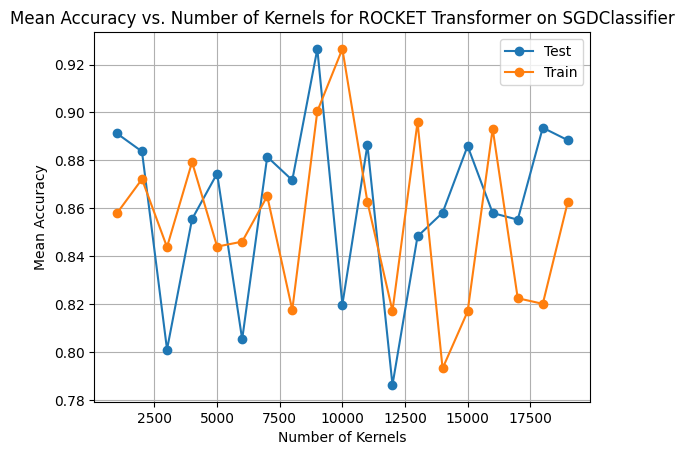

In [50]:

# Initialize empty lists to store mean accuracy scores for each configuration
mean_accuracy_test = []
mean_accuracy_train = []

# Iterate through different numbers of kernels
for i in range(1000, 20000, 1000):    
    # Create a ROCKET transformer with the current number of kernels
    rocket_transformer = Rocket(num_kernels=i)
    
    # Create a pipeline with the ROCKET transformer and a classifier (e.g., SGDClassifier)
    rocket_pipeline = Pipeline([
        ('rocket', rocket_transformer),
        ('classifier', SGDClassifier(
                   loss= best_params['classifier__loss']))
    ])
    
    # Define a custom scoring function for accuracy
    accuracy_scorer = make_scorer(accuracy_score)
    
    # Perform cross-validation and get accuracy scores for test and training sets
    cv_scores_test = cross_val_score(rocket_pipeline, X3d, y, cv=5, scoring=accuracy_scorer)
    cv_scores_train = cross_val_score(rocket_pipeline, X3d, y, cv=5, scoring=accuracy_scorer)
    
    # Calculate the mean accuracy scores for test and training sets
    mean_accuracy_test.append(np.mean(cv_scores_test))
    mean_accuracy_train.append(np.mean(cv_scores_train))

# Plot the mean accuracy values
rocket_num_kernels = range(1000, 20000, 1000)

plt.plot(rocket_num_kernels, mean_accuracy_test, marker='o', label='Test')
plt.plot(rocket_num_kernels, mean_accuracy_train, marker='o', label='Train')
plt.xlabel('Number of Kernels')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy vs. Number of Kernels for ROCKET Transformer on SGDClassifier')
plt.grid(True)
plt.legend()
plt.show()

In [55]:
tuned_rocket_pipeline_sdg = make_pipeline(
    Rocket(num_kernels = 9200 ),  SGDClassifier(
        loss= best_params['classifier__loss'], 
       
    ))


In [56]:
cv_accuracy_rocket = cross_val_score(tuned_rocket_pipeline_sdg, X3d, y, cv=8, verbose = 0,  n_jobs = -1 )
print("8x CV Accuracy tuned SDGClassifier with rocket: {0:.2f}".format(cv_accuracy_rocket.mean())) 
cv_accuracy_rocket

8x CV Accuracy tuned SDGClassifier with rocket: 0.88


array([0.94339623, 0.71698113, 0.96226415, 0.77358491, 0.94339623,
       0.94230769, 0.80769231, 0.94230769])

#### Observations on different kernel sizes and SDGClassifier 

We have some interesting results here: 
1. We developed a graph where we see that our accuracy is better for 9200 kernels however this evaluation doesn't take into consideration other metrics.
2. After implementing the best kernel size we observed an accuracy of 0.88, an improvement as our baseline for ROCKET with SDGClassifier was 0.83
3. I used the train and test split method in order to see how well different kernel sizes performed on the test and train datasets. We were able to see that the kernel size of 10000 did not generalize as well on the train data.

#### Using visualisation to see the best value for kernel number for kNNClassifier

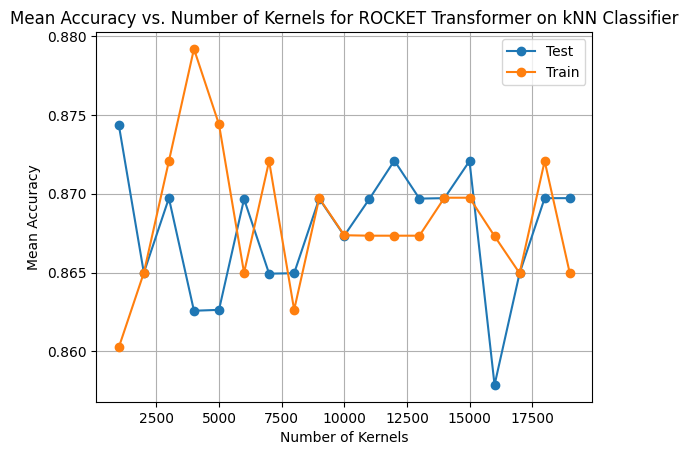

In [57]:

# Initialize empty lists to store mean accuracy scores for each configuration
mean_accuracy_test = []
mean_accuracy_train = []

# Iterate through different numbers of kernels
for i in range(1000, 20000, 1000):    
    # Create a ROCKET transformer with the current number of kernels
    rocket_transformer = Rocket(num_kernels=i)
    
    # Create a pipeline with the ROCKET transformer and a classifier (e.g., SGDClassifier)
    rocket_pipeline_knn = Pipeline([
        ('rocket', rocket_transformer),
        ('classifier', KNeighborsClassifier(
        n_neighbors=best_parameters_knn['classifier__n_neighbors']))
    ])
    
    # Define a custom scoring function for accuracy
    accuracy_scorer = make_scorer(accuracy_score)
    
    # Perform cross-validation and get accuracy scores for test and training sets
    cv_scores_test = cross_val_score(rocket_pipeline_knn, X3d, y, cv=5, scoring=accuracy_scorer)
    cv_scores_train = cross_val_score(rocket_pipeline_knn, X3d, y, cv=5, scoring=accuracy_scorer)
    
    # Calculate the mean accuracy scores for test and training sets
    mean_accuracy_test.append(np.mean(cv_scores_test))
    mean_accuracy_train.append(np.mean(cv_scores_train))

rocket_num_kernels = range(1000, 20000, 1000)

# Plot the mean accuracy values
plt.plot(rocket_num_kernels, mean_accuracy_test, marker='o', label='Test')
plt.plot(rocket_num_kernels, mean_accuracy_train, marker='o', label='Train')
plt.xlabel('Number of Kernels')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy vs. Number of Kernels for ROCKET Transformer on kNN Classifier')
plt.grid(True)
plt.legend()
plt.show()

In [60]:
tuned_rocket_pipeline_knn = make_pipeline(
    Rocket(num_kernels = 12100),  KNeighborsClassifier(
        n_neighbors=best_parameters_knn['classifier__n_neighbors'],
    ))


In [61]:
cv_accuracy_rocket = cross_val_score(tuned_rocket_pipeline_knn, X3d, y, cv=8, verbose = 0,  n_jobs = -1 )
print("8x CV tuned Accuracy KNNClassifer with rocket: {0:.2f}".format(cv_accuracy_rocket.mean())) 
cv_accuracy_rocket

8x CV tuned Accuracy KNNClassifer with rocket: 0.87


array([0.75471698, 0.81132075, 0.9245283 , 0.86792453, 0.81132075,
       0.88461538, 0.98076923, 0.94230769])

#### Using visualisation to see the best value for kernel number for SVC Classifier

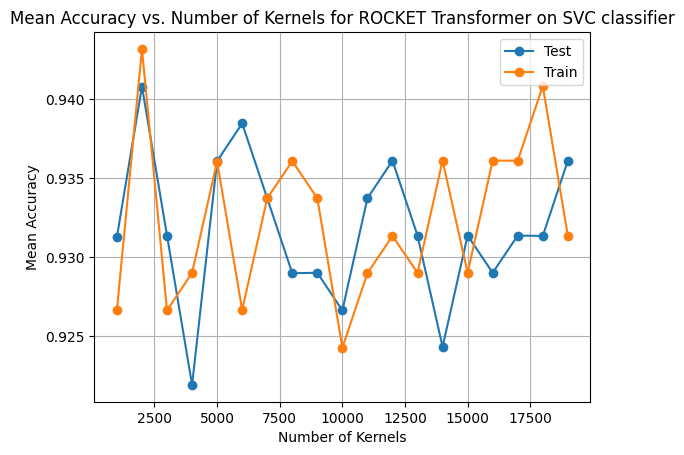

In [62]:

# Initialize empty lists to store mean accuracy scores for each configuration
mean_accuracy_test = []
mean_accuracy_train = []

# Iterate through different numbers of kernels
for i in range(1000, 20000, 1000):    
    # Create a ROCKET transformer with the current number of kernels
    rocket_transformer = Rocket(num_kernels=i)
    
    # Create a pipeline with the ROCKET transformer and a classifier (e.g., SGDClassifier)
    rocket_pipeline_svc = Pipeline([
        ('rocket', rocket_transformer),  
        ('classifier', SVC(
        C =best_parameters_svc['classifier__C'],
        kernel = best_parameters_svc['classifier__kernel']
    ))
    ])
    
    # Define a custom scoring function for accuracy
    accuracy_scorer = make_scorer(accuracy_score)
    
    # Perform cross-validation and get accuracy scores for test and training sets
    cv_scores_test = cross_val_score(rocket_pipeline_svc, X3d, y, cv=5, scoring=accuracy_scorer)
    cv_scores_train = cross_val_score(rocket_pipeline_svc, X3d, y, cv=5, scoring=accuracy_scorer)
    
    # Calculate the mean accuracy scores for test and training sets
    mean_accuracy_test.append(np.mean(cv_scores_test))
    mean_accuracy_train.append(np.mean(cv_scores_train))

rocket_num_kernels = range(1000, 20000, 1000)

# Plot the mean accuracy values
plt.plot(rocket_num_kernels, mean_accuracy_test, marker='o', label='Test')
plt.plot(rocket_num_kernels, mean_accuracy_train, marker='o', label='Train')
plt.xlabel('Number of Kernels')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy vs. Number of Kernels for ROCKET Transformer on SVC classifier')
plt.grid(True)
plt.legend()
plt.show()

In [63]:
tuned_rocket_pipeline_svc = make_pipeline(
    Rocket(num_kernels = 2000),  SVC(
        C =best_parameters_svc['classifier__C'],
        kernel = best_parameters_svc['classifier__kernel']
    ))

In [64]:
cv_accuracy_rocket = cross_val_score(tuned_rocket_pipeline_svc, X3d, y, cv=8, verbose = 0,  n_jobs = -1 )
print("8x CV Accuracy tuned SVC Classifier with rocket: {0:.2f}".format(cv_accuracy_rocket.mean())) 
cv_accuracy_rocket

8x CV Accuracy tuned SVC Classifier with rocket: 0.95


array([0.9245283 , 0.83018868, 0.98113208, 0.98113208, 0.90566038,
       1.        , 1.        , 0.94230769])

#### Using visualisation to see the best value for kernel number for Random Forest Classifier

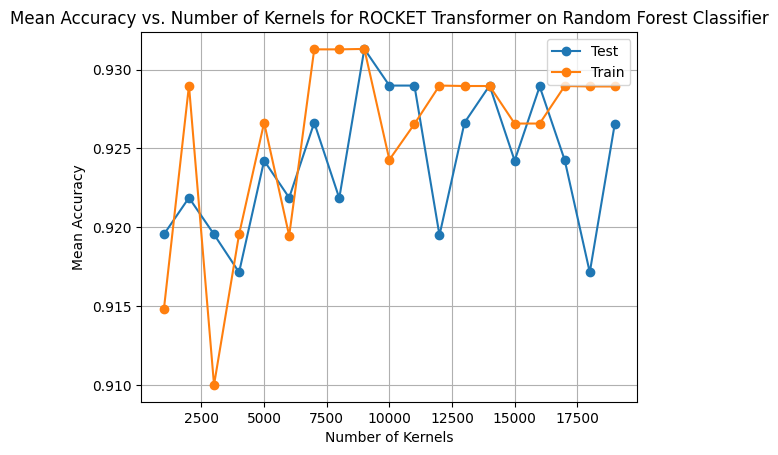

In [65]:

# Initialize empty lists to store mean accuracy scores for each configuration
mean_accuracy_test = []
mean_accuracy_train = []

# Iterate through different numbers of kernels
for i in range(1000, 20000, 1000):    
    # Create a ROCKET transformer with the current number of kernels
    rocket_transformer = Rocket(num_kernels=i)
    
    # Create a pipeline with the ROCKET transformer and a classifier (e.g., SGDClassifier)
    rocket_pipeline_rf = Pipeline([
        ('rocket', rocket_transformer),  
        ('classifier', RandomForestClassifier(
        n_estimators =best_parameters_rf['classifier__n_estimators'],
        max_depth = best_parameters_rf['classifier__max_depth']
    ))
    ]) 
    
    # Define a custom scoring function for accuracy
    accuracy_scorer = make_scorer(accuracy_score)
    
    # Perform cross-validation and get accuracy scores for test and training sets
    cv_scores_test = cross_val_score(rocket_pipeline_rf, X3d, y, cv=5, scoring=accuracy_scorer)
    cv_scores_train = cross_val_score(rocket_pipeline_rf, X3d, y, cv=5, scoring=accuracy_scorer)
    
    # Calculate the mean accuracy scores for test and training sets
    mean_accuracy_test.append(np.mean(cv_scores_test))
    mean_accuracy_train.append(np.mean(cv_scores_train))

rocket_num_kernels = range(1000, 20000, 1000)

# Plot the mean accuracy values
plt.plot(rocket_num_kernels, mean_accuracy_test, marker='o', label='Test')
plt.plot(rocket_num_kernels, mean_accuracy_train, marker='o', label='Train')
plt.xlabel('Number of Kernels')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy vs. Number of Kernels for ROCKET Transformer on Random Forest Classifier')
plt.grid(True)
plt.legend()
plt.show()

In [66]:
tuned_rocket_pipeline_rf = make_pipeline(
    Rocket(num_kernels = 9200),  RandomForestClassifier(
        n_estimators =best_parameters_rf['classifier__n_estimators'],
        max_depth = best_parameters_rf['classifier__max_depth']
    ))

In [67]:
cv_accuracy_rocket = cross_val_score(tuned_rocket_pipeline_rf, X3d, y, cv=8, verbose = 0,  n_jobs = -1 )
print("8x CV Accuracy tuned Random Forest Classifier with rocket: {0:.2f}".format(cv_accuracy_rocket.mean())) 
cv_accuracy_rocket

8x CV Accuracy tuned Random Forest Classifier with rocket: 0.94


array([0.9245283 , 0.88679245, 0.96226415, 0.96226415, 0.88679245,
       1.        , 1.        , 0.92307692])

#### Optimal Model for ROCKET Transformer and Accuracy Rate 
1. We can that Random Forest Classifier with ROCKET did the best with an accuracy of 0.94.
2. We can observe the impact on different kernel sizes on train-test splits on different models.

### Task 5
Test to see if the main conclusions from Tasks 3 and 4 hold up with the data for subject B. Comment on your findings. 

In [68]:
fatigue_df_B = pd.read_csv('fatigueB.csv', header = None) # sep = '\s+')
print(fatigue_df_B.shape)
fatigue_df_B

(251, 181)


,0,1,2,3,4,5,6,7,8,9,...,171,172,173,174,175,176,177,178,179,180
0,F,1.49,4.09,9.27,12.70,12.80,12.00,12.40,13.20,13.00,...,9.53,9.30,9.61,9.25,8.07,7.62,8.76,9.61,7.63,3.57
1,F,7.35,7.25,7.80,7.94,7.34,6.48,5.87,5.47,5.20,...,8.92,7.66,7.76,8.28,8.99,10.20,11.60,11.90,10.70,8.72
2,F,9.31,9.06,9.41,9.51,9.23,9.14,9.08,8.45,7.63,...,11.40,10.50,9.63,9.29,9.75,10.20,10.10,10.10,10.20,10.00
3,F,9.82,10.50,9.86,10.20,10.90,10.60,9.97,9.50,8.15,...,11.50,10.60,9.07,7.65,6.83,6.67,6.28,5.09,4.77,7.00
4,F,4.68,3.68,4.63,5.01,4.05,3.40,4.00,4.62,4.25,...,11.90,10.60,11.10,12.90,14.00,13.60,13.00,12.80,11.50,8.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,NF,5.47,5.91,6.08,6.72,8.01,8.76,8.48,8.15,8.23,...,11.00,9.36,9.18,9.72,9.54,8.58,7.64,6.76,5.73,5.18
247,NF,4.79,5.81,6.82,7.60,8.36,9.01,9.19,9.04,8.79,...,13.70,12.90,11.80,9.63,7.22,5.84,5.64,5.63,5.09,4.53
248,NF,4.05,4.92,5.89,6.83,7.89,8.74,8.99,8.86,8.60,...,8.02,7.02,6.58,6.33,5.77,4.99,4.51,4.36,4.11,3.80
249,NF,3.98,4.71,4.72,5.26,6.18,6.55,7.01,7.75,7.50,...,7.68,7.50,6.54,5.74,5.45,5.12,4.64,3.91,2.97,2.90


In [80]:
print(fatigue_df.isnull().sum().sum())


0


Text(0, 0.5, 'Accel Mag')

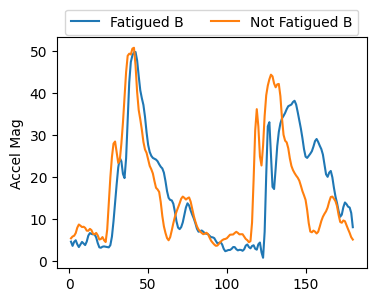

In [70]:
fatigue_df_B.iloc[4][1:].plot(label='Fatigued B')
fatigue_df_B.iloc[-5][1:].plot(figsize=(4,3), label = 'Not Fatigued B')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),ncol=2)
plt.ylabel('Accel Mag')


In [71]:
y_B = fatigue_df_B.pop(0).values
X_B = fatigue_df_B.values

#### Implementing SDGClassifier on dataset B 

In [81]:
sgd_scores = cross_val_score(SGDpipe_tuned, X_B, y_B, cv=8, verbose = 0,  n_jobs = -1)
print("8x CV Accuracy Tuned SDGClassifiers: {0:.2f}".format(sgd_scores.mean())) 
sgd_scores

8x CV Accuracy Tuned SDGClassifiers: 0.81


array([0.8125    , 0.875     , 0.84375   , 0.70967742, 0.87096774,
       1.        , 0.80645161, 0.58064516])

#### Implementing kNN classifier on dataset B 

In [72]:
knn_df_B_scores = cross_val_score(knn_pipeline_tuned, X_B, y_B, cv=8, verbose = 0,  n_jobs = -1)
print("8x CV Accuracy KNNClassifer: {0:.2f}".format(knn_df_B_scores.mean())) 
knn_df_B_scores

8x CV Accuracy KNNClassifer: 0.90


array([0.8125    , 0.90625   , 1.        , 0.83870968, 0.90322581,
       0.96774194, 0.87096774, 0.87096774])

#### Implementing SVC classifier on dataset B 

In [73]:
svc_df_B_scores = cross_val_score(svc_pipeline_tuned, X_B, y_B, cv=8, verbose = 0,  n_jobs = -1)
print("8x CV Accuracy  SVC Classifer: {0:.2f}".format(svc_df_B_scores.mean())) 
svc_df_B_scores

8x CV Accuracy  SVC Classifer: 0.94


array([0.84375   , 0.96875   , 1.        , 0.93548387, 1.        ,
       1.        , 0.90322581, 0.83870968])

#### Implementing Random Forest classifier on dataset B 

In [75]:
rf_df_B_scores = cross_val_score(rf_pipeline_tuned, X_B, y_B, cv=8, verbose = 0,  n_jobs = -1)
print("8x CV Accuracy Random Forest Classifer: {0:.2f}".format(rf_df_B_scores.mean())) 
rf_df_B_scores

8x CV Accuracy Random Forest Classifer: 0.90


array([0.75      , 0.9375    , 1.        , 0.96774194, 0.93548387,
       1.        , 0.77419355, 0.83870968])

In [76]:
X3d_B = X_B[:,np.newaxis,:] # time series algs require a 3D data array (sample, var, tick)
X3d_B.shape

(251, 1, 180)

#### Implementing rocket transformer with SDGClassifier  on dataset B 

In [83]:
cv_accuracy_rocketsdg_B = cross_val_score(tuned_rocket_pipeline_sdg, X3d_B, y_B, cv=8, verbose = 0,  n_jobs = -1 )
print("8x CV Accuracy tuned SDGClassifier with rocket: {0:.2f}".format(cv_accuracy_rocketsdg_B.mean())) 
cv_accuracy_rocketsdg_B

8x CV Accuracy tuned SDGClassifier with rocket: 0.88


array([0.78125   , 0.875     , 0.9375    , 0.96774194, 1.        ,
       1.        , 0.93548387, 0.5483871 ])

#### Implementing rocket transformer with kNN classifier  on dataset B 

In [77]:
cv_accuracy_rocketknn_B = cross_val_score(tuned_rocket_pipeline_knn, X3d_B, y_B, cv=8, verbose = 0,  n_jobs = -1 )
print("8x CV tuned Accuracy KNNClassifer: {0:.2f}".format(cv_accuracy_rocketknn_B.mean())) 
cv_accuracy_rocketknn_B

8x CV tuned Accuracy KNNClassifer: 0.92


array([0.78125   , 0.9375    , 0.96875   , 0.93548387, 0.96774194,
       1.        , 0.93548387, 0.80645161])

#### Implementing rocket transformer with SVC Classifier on dataset B 

In [78]:
cv_accuracy_rocketsvc_B = cross_val_score(tuned_rocket_pipeline_svc, X3d_B, y_B, cv=8, verbose = 0,  n_jobs = -1 )
print("8x CV tuned Accuracy SVC Classifer: {0:.2f}".format(cv_accuracy_rocketsvc_B.mean())) 
cv_accuracy_rocketsvc_B

8x CV tuned Accuracy SVC Classifer: 0.96


array([0.84375   , 0.96875   , 1.        , 1.        , 0.96774194,
       1.        , 0.96774194, 0.93548387])

#### Implementing rocket transformer with Random Forest Classifier on dataset B 

In [79]:
cv_accuracy_rocketrf_B = cross_val_score(tuned_rocket_pipeline_rf, X3d_B, y_B, cv=8, verbose = 0,  n_jobs = -1 )
print("8x CV tuned Accuracy Random Forest Classifer: {0:.2f}".format(cv_accuracy_rocketrf_B.mean())) 
cv_accuracy_rocketrf_B

8x CV tuned Accuracy Random Forest Classifer: 0.94


array([0.78125   , 0.9375    , 0.90625   , 1.        , 1.        ,
       1.        , 0.96774194, 0.93548387])

#### Overall Observations using the same logic of Task 3 and Task 4 on Dataset B 
1. Our subject Dataset B is significantly smaller than Dataset A, which is why I decided cross-validation seemed like a better fit to evaluate the performance of our models.
2. From our accuracy results our finding seems to be consistent - we can observe that the logic used on Dataset A performs very well on both datasets. 
3. Both datasets A and B performed the best with a fine-tuned SVC classifier.
4. For both datasets SVC classifier with the ROCKET Transformer of 2000 kernels performs the best. 


